<a href="https://colab.research.google.com/github/santoshF/python/blob/master/FinanceDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finance Data Science

In [2]:
# prompt: create a dataframe using yfinance library

import subprocess

def is_installed(package_name):
    try:
        subprocess.check_call(['pip', 'show', package_name], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
        return True
    except subprocess.CalledProcessError:
        return False

library_name = 'yfinance'

if not is_installed(library_name):
    # Run your program here
    print(f"{library_name} is not installed. Running the program...")
    # Your program code here
else:
    print(f"{library_name} is already installed. Not running the program.")


import pandas as pd
from pandas_datareader import data as web
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import datetime as dt

yfinance is already installed. Not running the program.


In [3]:
import yfinance as yf

etn = yf.Ticker("ETN")
# get historical market data
hist = etn.history(period="5y")
df = pd.DataFrame(hist)
df['Prev_Close'] = df['Close'].shift(-1)
df.to_csv('eaton_open_close.csv')

In [4]:
etn.info.keys()

dict_keys(['address1', 'address2', 'city', 'zip', 'country', 'phone', 'website', 'industry', 'industryKey', 'industryDisp', 'sector', 'sectorKey', 'sectorDisp', 'longBusinessSummary', 'fullTimeEmployees', 'companyOfficers', 'auditRisk', 'boardRisk', 'compensationRisk', 'shareHolderRightsRisk', 'overallRisk', 'governanceEpochDate', 'compensationAsOfEpochDate', 'irWebsite', 'maxAge', 'priceHint', 'previousClose', 'open', 'dayLow', 'dayHigh', 'regularMarketPreviousClose', 'regularMarketOpen', 'regularMarketDayLow', 'regularMarketDayHigh', 'dividendRate', 'dividendYield', 'exDividendDate', 'payoutRatio', 'fiveYearAvgDividendYield', 'beta', 'trailingPE', 'forwardPE', 'volume', 'regularMarketVolume', 'averageVolume', 'averageVolume10days', 'averageDailyVolume10Day', 'bid', 'ask', 'bidSize', 'askSize', 'marketCap', 'fiftyTwoWeekLow', 'fiftyTwoWeekHigh', 'priceToSalesTrailing12Months', 'fiftyDayAverage', 'twoHundredDayAverage', 'trailingAnnualDividendRate', 'trailingAnnualDividendYield', 'curr

In [5]:
data = etn.balance_sheet
data.T

,Ordinary Shares Number,Share Issued,Net Debt,Total Debt,Tangible Book Value,Invested Capital,Working Capital,Net Tangible Assets,Capital Lease Obligations,Common Stock Equity,...,Work In Process,Raw Materials,Receivables,Accounts Receivable,Allowance For Doubtful Accounts Receivable,Gross Accounts Receivable,Cash Cash Equivalents And Short Term Investments,Other Short Term Investments,Cash And Cash Equivalents,Cash Financial
2023-12-31,399400000.0,399400000.0,8781000000.0,9802000000.0,-1033000000.0,28305000000.0,3928000000.0,-1033000000.0,533000000.0,19036000000.0,...,870000000.0,1515000000.0,4475000000.0,4475000000.0,-38000000.0,4513000000.0,2609000000.0,2121000000.0,488000000.0,488000000.0
2022-12-31,397800000.0,397800000.0,8361000000.0,9114000000.0,-3244000000.0,25693000000.0,2386000000.0,-3244000000.0,459000000.0,17038000000.0,...,781000000.0,1275000000.0,4076000000.0,4076000000.0,-31000000.0,4107000000.0,555000000.0,261000000.0,294000000.0,294000000.0
2021-12-31,398800000.0,398800000.0,8282000000.0,8916000000.0,-4193000000.0,24992000000.0,299000000.0,-4193000000.0,337000000.0,16413000000.0,...,620000000.0,1096000000.0,3297000000.0,3297000000.0,-42000000.0,3339000000.0,568000000.0,271000000.0,297000000.0,297000000.0
2020-12-31,398100000.0,398100000.0,7620000000.0,8384000000.0,-2148000000.0,22988000000.0,3297000000.0,-2148000000.0,326000000.0,14930000000.0,...,498000000.0,803000000.0,2904000000.0,2904000000.0,-48000000.0,2952000000.0,1102000000.0,664000000.0,438000000.0,438000000.0
2019-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
income_statement = etn.income_stmt
income_statement.T

,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,...,Total Other Finance Cost,Interest Expense Non Operating,Operating Income,Operating Expense,Research And Development,Selling General And Administration,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue
2023-12-31,0.0,0.158,4904000000.0,0.0,0.0,3218000000.0,926000000.0,14762000000.0,4904000000.0,3978000000.0,...,NaN,151000000.0,3885000000.0,4549000000.0,754000000.0,3795000000.0,8434000000.0,14762000000.0,23196000000.0,23196000000.0
2022-12-31,3672000.0,0.153,3985000000.0,24000000.0,24000000.0,2462000000.0,954000000.0,13865000000.0,4009000000.0,3055000000.0,...,NaN,144000000.0,2995000000.0,3892000000.0,665000000.0,3227000000.0,6887000000.0,13865000000.0,20752000000.0,20752000000.0
2021-12-31,159803000.0,0.259,3345000000.0,617000000.0,617000000.0,2144000000.0,922000000.0,13293000000.0,3962000000.0,3040000000.0,...,NaN,144000000.0,2463000000.0,3872000000.0,616000000.0,3256000000.0,6335000000.0,13293000000.0,19628000000.0,19628000000.0
2020-12-31,41990000.0,0.19,2485000000.0,221000000.0,221000000.0,1410000000.0,811000000.0,12408000000.0,2706000000.0,1895000000.0,...,NaN,149000000.0,1824000000.0,3626000000.0,551000000.0,3075000000.0,5450000000.0,12408000000.0,17858000000.0,17858000000.0
2019-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,236000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


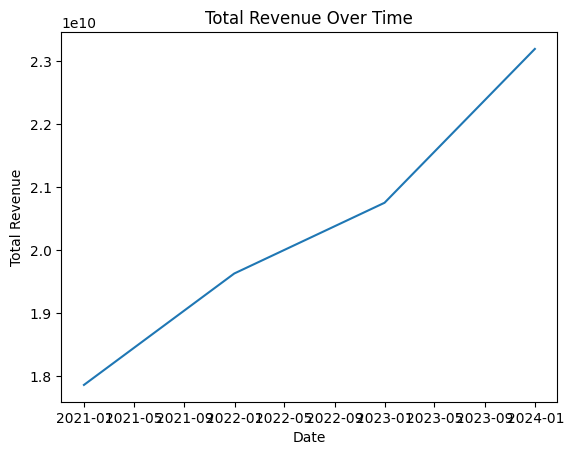

In [11]:
# prompt: plot dates and total revenue

import matplotlib.pyplot as plt
income_statement = etn.income_stmt
income_statement = income_statement.T
plt.plot(income_statement.index, income_statement['Total Revenue'])
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.title("Total Revenue Over Time")
plt.show()
